Lab 3-AdvancedTopics

Participants: Ana Estefanía Henao Restrepo y Juan José Gil Hoyos

# Exercise 1

Vector embeddings or just embeddings is a technique that allows us to represent words, sentences or even an entire document as numerical vectors. This technique is useful to execute machine learning algorithms because as you may know, this kind of techniques only work with numbers.

The idea is that similar words will have similar vector representations. This is useful for many NLP tasks, such as text classification, text clustering, etc.

Finally, now that we have a vector representation for words, we can represent them in a N-dimensional space and perform mathematical operations with them. For example, we can calculate the cosine similarity between two words.

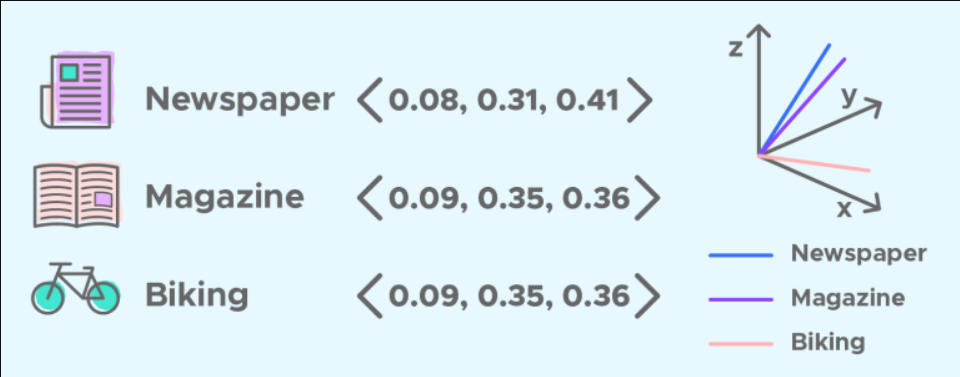

# Exercise 2

In order to answer this question, let's consider the three most popular distance measures:
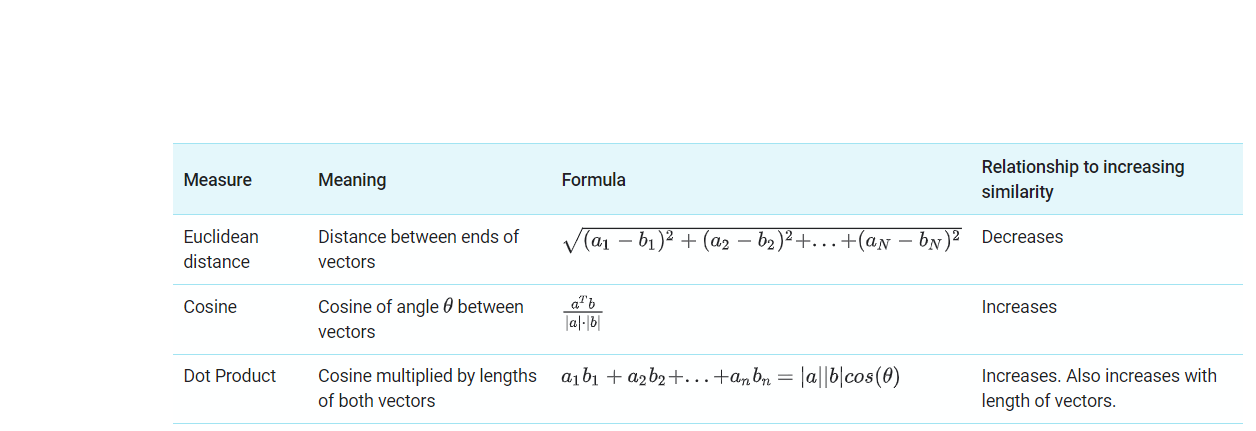


In contrast to the cosine, the dot product is proportional to the vector length. This is important because examples that appear very frequently in the training set (for example, popular YouTube videos) tend to have embedding vectors with large lengths. If you want to capture popularity, then choose dot product. However, the risk is that popular examples may skew the similarity metric. To balance this skew, you can raise the length to an exponent *&alpha;<1* to calculate the dot product as *|a|<sup>&alpha;</sup>|b|<sup>&alpha;</sup>cos(&theta;)*. This is called the **generalized dot product**.

To better understand how vector length changes the similarity measure, normalize the vector lengths to 1 and notice that the three measures become proportional to each other:

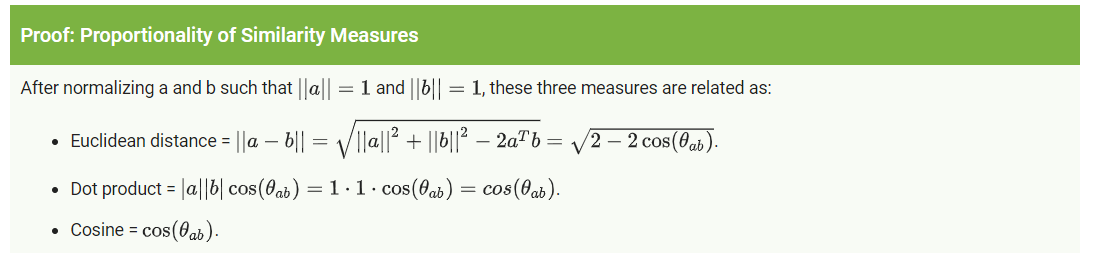

As you can see from the image above, all three similarity measures are equivalent because they can be proportional to cos(&theta;<sub>ab)

According to the previous analysis, I would choose the Cosine distance measurement because the other two methods can be expressed in therms of te angle. However, it is important to mention that the choice of distance metric should be guided by the nature of your data and the specific goals of your task. It's common to experiment with multiple distance metrics to determine which one works best for a particular problem through cross-validation or other evaluation methods. Additionally, some machine learning algorithms may be less sensitive to the choice of distance metric, as they can adapt to the data during training.

# Exercise 3

Let's create a sample text related to Dragon Ball franchise:

In [ ]:
# Sample text (you can replace this with your text corpus)
text = """

Once upon a time in the peaceful village of Mount Paozu, a young boy named Goku lived a simple life. Unbeknownst to him, Goku was no ordinary child; he was a Saiyan, an alien warrior race
Goku's life took an unexpected turn when he met Bulma, a brilliant scientist, who sought the Dragon Balls, magical orbs that could grant any wish. Together, Goku and Bulma embarked on a journey
filled with adventures, encountering strange creatures, and forming lasting friendships. Along the way, Goku's life became intertwined with the pursuit of the Dragon Balls, leading to epic battles with formidable foes like Emperor Pilaf and the shape-shifting Oolong.
As Goku grew, he discovered his true heritage as a Saiyan and began training under the wise Master Roshi, known as the Turtle Hermit. This phase of Goku's life was marked by grueling training, humorous mishaps, and the learning of powerful techniques like the Kamehameha wave.
The World Martial Arts Tournament played a significant role in Goku's life, where he faced strong opponents like Krillin and Yamcha. These tournaments showcased Goku's martial arts prowess and served as a platform to make lifelong friends.
Goku's life took a dramatic turn when he learned about the existence of his evil Saiyan brother, Raditz, who threatened Earth's peace. Goku sacrificed his life to save the planet but was later resurrected and sent to the planet Namek, where he confronted the tyrannical Frieza.
In the midst of these challenges, Goku's life saw him ascend to the legendary Super Saiyan form, a transformation that unlocked immense power. This transformation marked a turning point in Goku's life and the series.
Dragon Ball Z Kai brought a new perspective to Goku's life, offering a remastered version of the original Z series. It condensed the storyline and focused on the core events of Goku's life, making the saga more accessible to a new generation of fans.
Dragon Ball GT saw Goku's life take an unexpected twist when he was transformed into a child and set on a quest to recover the Black Star Dragon Balls. This phase of Goku's life brought new adventures, including battles against formidable foes like Baby and Omega Shenron.
Dragon Ball Super introduced Goku's life to a multiverse of possibilities. It showcased epic battles with gods and otherworldly foes and introduced new transformations, such as Super Saiyan Blue and Ultra Instinct. Goku's life in Dragon Ball Super expanded the boundaries of his power and explored the concept of alternate realities.
As Goku's life continued, he passed on his martial arts knowledge to the next generation, including his son Gohan and protege Uub. Goku's legacy lived on, ensuring that the spirit of adventure and the pursuit of strength would endure.
In his later years, Goku's life saw him exploring other realms and dimensions, seeking new challenges and adventures. His journey was a testament to his unwavering spirit, dedication to protecting Earth, and his never-ending quest for self-improvement as a martial artist.
And so, Goku's life, filled with battles, friendships, and extraordinary transformations, became a legendary tale known throughout the Dragon Ball universe, inspiring generations to come.

"""

Let's install and import the required libraries:

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForQuestionAnswering
import torch
import nltk

Now let's split the test into meaningful chunks:

In [ ]:
nltk.download('punkt')

# Load pre-trained BERT model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"  # You can choose a different model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForQuestionAnswering.from_pretrained(model_name)

# Split the text into meaningful chunks (in this case, sentences)
sentences = nltk.sent_tokenize(text)  # Split into sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are several tools and approaches that could help us generate vector embeddings easily and at a high level of quality. Let's talk about these options:

* **Pre-trained Language Models:** Utilize pre-trained language models like BERT, GPT-3, RoBERTa, or others. These models are trained on massive text corpora and can generate high-quality embeddings for both questions and text chunks.

* **Hugging Face Transformers Library:** The Hugging Face Transformers library provides a user-friendly interface for working with pre-trained models. We can load models, tokenize text, and generate embeddings easily using this library.

* **Sentence Transformers:** This library is specifically designed for generating embeddings from sentences or text chunks. It includes pre-trained models like BERT, RoBERTa, and more, fine-tuned for sentence-level tasks.

* **Spacy:** Spacy is a popular NLP library that provides word and sentence embeddings. While not as powerful as some pre-trained models, it can be a lightweight solution for certain tasks.

* **Word Embeddings (Word2Vec, GloVe):** If you're working with individual words or need word-level embeddings within your text chunks, pre-trained word embeddings like Word2Vec or GloVe can be useful.

* **Pooling Strategies:** For generating embeddings from the output of pre-trained models, consider pooling strategies like averaging word embeddings, max-pooling, or using special tokens like [CLS] or [SEP] embeddings, depending on the model architecture.

Let's use Hugging Face transformers:

In [ ]:
# User's question
question = "What is the most remarkable thing that Goku did?"

# Initialize a list to store relevant chunks
relevant_chunks = []

# Tokenize the question
question_tokens = tokenizer.tokenize(question)

# Iterate through the paragraphs
for sentence in sentences:
    # Tokenize the paragraph
    sentence_tokens = tokenizer.tokenize(sentence)

     # Skip empty chunks or tokens
    if not sentence_tokens:
        continue

    # Tokenize the question and chunk and feed them to the model
    inputs = tokenizer.encode_plus(question_tokens, sentence_tokens, return_tensors="pt", padding=True, truncation=True)


    # Get the model's predicted answer span
    with torch.no_grad():
        start_logits, end_logits = model(**inputs)["start_logits"], model(**inputs)["end_logits"]

    # Get the answer span
    start_idx = torch.argmax(start_logits, dim = 1).item()
    end_idx = torch.argmax(end_logits, dim = 1).item()

    # Decode and store the answer
    answer = tokenizer.decode(inputs["input_ids"][0][start_idx:end_idx + 1])
    relevant_chunks.append((sentence, answer))

# Sort the relevant chunks by answer relevance (you can use more advanced ranking methods)
relevant_chunks.sort(key=lambda x: len(x[1]), reverse=False)

# Define N (number of relevant chunks to return)
N = 20

# Get the top N most relevant chunks
top_chunks = relevant_chunks[:N]

print('Main question: '.upper(), question.upper())

# Print the most relevant chunks and their answers
for i, (sentence, answer) in enumerate(top_chunks, 1):
    print(f"Sentence {i}:")
    print(sentence)
    print("Answer:", answer)
    print("=" * 50)

MAIN QUESTION:  WHAT IS THE MOST REMARKABLE THING THAT GOKU DID?
Sentence 1:
These tournaments showcased Goku's martial arts prowess and served as a platform to make lifelong friends.
Answer: tournaments
Sentence 2:
His journey was a testament to his unwavering spirit, dedication to protecting Earth, and his never-ending quest for self-improvement as a martial artist.
Answer: his journey
Sentence 3:
Unbeknownst to him, Goku was no ordinary child; he was a Saiyan, an alien warrior race
Goku's life took an unexpected turn when he met Bulma, a brilliant scientist, who sought the Dragon Balls, magical orbs that could grant any wish.
Answer: he met bulma
Sentence 4:
This transformation marked a turning point in Goku's life and the series.
Answer: transformation
Sentence 5:


Once upon a time in the peaceful village of Mount Paozu, a young boy named Goku lived a simple life.
Answer: lived a simple life
Sentence 6:
Dragon Ball GT saw Goku's life take an unexpected twist when he was transforme

According to the results above, we would say that the results make sence, but they can be more complete.

# Exercise 4

Improving the robustness of a Question-and-Answer (Q&A) system in terms of semantics and functionality involves a combination of technological advancements, data quality, and algorithmic enhancements. Here are some key factors and strategies to consider:

1. Utilize state-of-the-art NLP models like ChatGPT, which can provide better semantic understanding and generate more coherent responses.

2. Incorporate not just text but also images, audio, and video to enhance contextual understanding. This is particularly important for understanding questions related to multimedia content.

3. Develop or integrate sophisticated semantic parsing techniques that can understand the structure and meaning of complex questions.

4. Build and integrate knowledge graphs that represent structured information about the world. This enables the system to answer questions by traversing the graph to find relevant facts and connections.

5. Enhance the system's ability to identify and understand named entities, such as people, places, and organizations, in order to provide more precise answers.

6. Improve the system's ability to recognize and utilize context from previous questions or statements within the same conversation to provide more coherent and relevant answers.

7. Implement mechanisms to fact-check answers against reliable sources and validate the accuracy of responses before presenting them to users.

8. Incorporate a feedback mechanism that allows users to rate the quality and relevance of answers.

9. Customize the Q&A system for specific domains or industries to provide more accurate and domain-specific answers. This may involve training the model on domain-specific data.

10. Expand the training data by incorporating diverse and high-quality sources to expose the model to a wide range of question types and language variations.

11. Fine-tune pre-trained models on specific Q&A tasks and domains to adapt them to the particular needs of the application.

12. Implement safeguards to ensure that the system provides unbiased and ethical responses, avoiding harmful or discriminatory content.

13. Ensure that the system can handle high volumes of queries efficiently and has low latency to provide a seamless user experience.

14. Allow the system to integrate with other applications and services through APIs, making it more versatile and useful in various contexts.

15. Implement mechanisms for the system to learn and adapt over time as it interacts with users and receives feedback.

Improving the robustness of a Q&A system is an ongoing process that requires a combination of cutting-edge technology, high-quality data, and a commitment to user feedback and improvement.